In [182]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score,RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE

In [183]:
df=pd.read_csv('train.csv')
dt=pd.read_csv('test.csv')

In [184]:
df.describe()

,ID,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,...,i3mag,Z3mag,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr
count,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,...,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000
mean,24326.761297,157.413606,-0.926899,0.927316,21.326973,19.904223,18.887562,18.323593,18.201334,18.022149,...,19.761906,18.653363,18.347970,18.157934,17.918551,17.825652,6.305703,79.624646,54.505159,35.399251
std,14038.295072,66.388946,2.411410,0.489506,2.345232,2.289705,2.024082,1.809982,1.721633,1.670744,...,1.452674,1.593221,1.491726,1.445090,1.369574,1.218845,1276.789991,5791.337827,3410.995424,2979.311817
min,1.000000,34.125470,-6.703610,0.000000,13.892700,12.227100,11.396600,10.969100,10.928600,11.072900,...,14.761300,13.642800,13.425000,13.477500,13.198100,13.105300,-99.000000,-99.000000,-99.000000,-99.000000
25%,12181.500000,134.743538,-2.492215,1.000000,19.420125,18.024200,17.272875,16.900425,16.835100,16.690250,...,18.748725,17.464400,17.226850,17.041725,16.863900,16.873950,0.647672,0.660015,0.668280,0.618118
50%,24300.000000,181.789490,-0.412005,1.000000,21.274150,19.840850,18.795950,18.309800,18.234400,18.070100,...,19.796850,18.682700,18.401000,18.208550,17.979500,17.902300,0.917700,0.869215,0.858840,0.816180
75%,36480.750000,209.603552,0.824670,1.000000,23.108600,21.820800,20.461875,19.658450,19.499125,19.253375,...,20.993350,19.773800,19.433475,19.182475,18.844775,18.628375,1.434217,1.287025,1.258892,1.193870
max,48685.000000,225.441880,3.021730,2.000000,33.162300,36.154200,25.110400,36.184800,23.480000,22.858900,...,24.570800,23.511900,22.461000,22.576200,24.343000,21.743800,134608.831100,668970.396270,427925.236530,435077.487900


In [185]:
#Observamos que las ultimas 4 columnas tienen valores invalidos lo que puede generar problemas al modelo de entrenamiento
#remplazamos cada valor referido a esto
df.replace(-99,np.nan,inplace=True) #La función replace() es un método de Pandas que permite reemplazar valores específicos en un DataFrame o en una Serie.
#Ademas puede haber valores faltantes por lo que completamos eñ codigo con estos valores tomando la mediana de cada columna
df.fillna(df.median(),inplace=True) #es un método de Pandas que se utiliza para reemplazar los valores faltantes (NaN) en un DataFrame
df = df[(np.abs(zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

In [186]:
#Observamos que las ultimas 4 columnas tienen valores invalidos lo que puede generar problemas al modelo de entrenamiento
#remplazamos cada valor referido a esto
dt.replace(-99,np.nan,inplace=True)
#Ademas puede haber valores faltantes por lo que completamos eñ codigo con estos valores tomando la mediana de cada columna
dt.fillna(dt.mean(),inplace=True)
#Repito lo de arriba pues si entreno testeo

In [187]:
df.set_index('ID',inplace=True)
dt.set_index('ID',inplace=True )

In [188]:
df.describe()
#Observemos que la tabla cambio

,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,Jmag,...,i3mag,Z3mag,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr
count,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,...,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000
mean,157.360796,-0.929178,0.928617,21.335616,19.921246,18.905479,18.340830,18.219830,18.040858,17.897774,...,19.775563,18.667906,18.362915,18.172680,17.932997,17.839259,1.187502,1.067709,1.046335,0.991587
std,66.447645,2.412967,0.489358,2.294431,2.253521,1.992963,1.777537,1.692167,1.641841,1.590443,...,1.429418,1.571144,1.468946,1.423578,1.348455,1.198915,0.670036,0.608891,0.687640,0.572283
min,34.125470,-6.703610,0.000000,14.933600,14.010000,13.410200,13.183300,13.290000,13.242000,13.200900,...,15.406500,14.082200,13.965200,13.998100,13.937100,14.187800,0.341090,0.232720,0.272110,0.305210
25%,134.679275,-2.496885,1.000000,19.438250,18.037500,17.286350,16.914100,16.848100,16.702000,16.595700,...,18.759850,17.477200,17.239700,17.055500,16.874400,16.888100,0.768925,0.695060,0.676735,0.645635
50%,181.800800,-0.412890,1.000000,21.285100,19.863400,18.810700,18.321600,18.246600,18.082400,17.937200,...,19.804000,18.690500,18.409500,18.216500,17.989800,17.909000,0.980705,0.883985,0.862190,0.828440
75%,209.710065,0.823405,1.000000,23.101350,21.819450,20.462100,19.659400,19.501050,19.254800,19.049300,...,20.992850,19.777000,19.435050,19.185600,18.847600,18.630900,1.430330,1.284630,1.253830,1.190005
max,225.441880,3.021730,2.000000,28.359000,26.698800,24.953900,23.645000,23.328600,22.858900,22.657800,...,23.935200,23.382200,22.461000,22.295300,21.908800,21.480300,23.131380,23.569090,57.702260,29.329210


In [189]:
#Ahora, como queremos que diferencie entre estrella, galaxia o cuasar, utilizamos las magnitudes
Bandas=['umag','gmag','rmag','imag','zmag','Ymag','Jmag','Hmag','Kmag','W1mag','W2mag'] #Estas solas magnitudes totales
#Elegimos en principio estas bandas 
#La función len() devuelve la cantidad de elementos en una lista
for i in range(len(Bandas)-1):
    df[f'{Bandas[i]}-{Bandas[i+1]}']=df[Bandas[i]]-df[Bandas[i+1]]
    dt[f'{Bandas[i]}-{Bandas[i+1]}']=dt[Bandas[i]]-dt[Bandas[i+1]]
Bandas_rad=['u3mag','g3mag','r3mag','i3mag','Z3mag','Y3mag','J3mag','H3mag','K3mag']
#Ahora en la misma linea de codigo, haremos lo mismo para las magnitudes a radio constante 3arcsecond
for i in range(len(Bandas_rad)-1):
    df[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=df[Bandas_rad[i]]-df[Bandas_rad[i+1]]
    dt[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=dt[Bandas_rad[i]]-dt[Bandas_rad[i+1]]
Bandas_HLR=['Yhlr','Jhlr','Hhlr','Khlr']
for i in range(len(Bandas_HLR)-1):
    df[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=df[Bandas_HLR[i]]-df[Bandas_HLR[i+1]]
    dt[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=dt[Bandas_HLR[i]]-dt[Bandas_HLR[i+1]]
df['W1mag/W2mag'] = df['W1mag'] / df['W2mag']
df['umag/gmag'] = df['umag'] / df['gmag']
df['gmag/rmag'] = df['gmag'] / df['rmag']
df['rmag/imag'] = df['rmag'] / df['imag']
df['Hmag/Kmag'] = df['Hmag'] / df['Kmag']
df['Jmag/Hmag'] = df['Jmag'] / df['Hmag']
dt['W1mag/W2mag'] = dt['W1mag'] / dt['W2mag']
dt['umag/gmag'] = dt['umag'] / dt['gmag']
dt['gmag/rmag'] = dt['gmag'] / dt['rmag']
dt['rmag/imag'] = dt['rmag'] / dt['imag']
dt['Hmag/Kmag'] = dt['Hmag'] / dt['Kmag']
dt['Jmag/Hmag'] = dt['Jmag'] / dt['Hmag']

In [190]:
df.describe()
#Observemos que la tabla cambio

,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,Jmag,...,H3mag-K3mag,Yhlr-Jhlr,Jhlr-Hhlr,Hhlr-Khlr,W1mag/W2mag,umag/gmag,gmag/rmag,rmag/imag,Hmag/Kmag,Jmag/Hmag
count,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,...,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000
mean,157.360796,-0.929178,0.928617,21.335616,19.921246,18.905479,18.340830,18.219830,18.040858,17.897774,...,0.093738,0.119793,0.021374,0.054747,0.977774,1.072482,1.053145,1.030061,1.004730,1.012443
std,66.447645,2.412967,0.489358,2.294431,2.253521,1.992963,1.777537,1.692167,1.641841,1.590443,...,0.281057,0.230671,0.396007,0.414543,0.018161,0.041854,0.026710,0.017572,0.016995,0.013448
min,34.125470,-6.703610,0.000000,14.933600,14.010000,13.410200,13.183300,13.290000,13.242000,13.200900,...,-2.527300,-17.031565,-56.674070,-22.201750,0.890621,0.798113,0.934201,0.732472,0.864715,0.834118
25%,134.679275,-2.496885,1.000000,19.438250,18.037500,17.286350,16.914100,16.848100,16.702000,16.595700,...,-0.064300,0.045900,-0.027410,-0.001735,0.967520,1.042581,1.033406,1.019117,0.994440,1.006435
50%,181.800800,-0.412890,1.000000,21.285100,19.863400,18.810700,18.321600,18.246600,18.082400,17.937200,...,0.174300,0.100840,0.026880,0.041230,0.974803,1.071859,1.054640,1.027736,1.008507,1.013747
75%,209.710065,0.823405,1.000000,23.101350,21.819450,20.462100,19.659400,19.501050,19.254800,19.049300,...,0.287400,0.177715,0.081935,0.092210,0.981527,1.100213,1.073594,1.041920,1.016386,1.019644
max,225.441880,3.021730,2.000000,28.359000,26.698800,24.953900,23.645000,23.328600,22.858900,22.657800,...,2.029900,11.156590,19.973640,56.741770,1.088578,1.407790,1.331557,1.198456,1.171118,1.337453


In [191]:
dt.describe()

,RAdeg,DEdeg,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,...,H3mag-K3mag,Yhlr-Jhlr,Jhlr-Hhlr,Hhlr-Khlr,W1mag/W2mag,umag/gmag,gmag/rmag,rmag/imag,Hmag/Kmag,Jmag/Hmag
count,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,...,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000
mean,156.613149,-0.941329,21.333312,19.913324,18.893525,18.327183,18.208126,18.026394,17.881192,17.659919,...,0.096717,-32.381068,43.785587,25.100636,0.977514,1.072817,1.053366,1.030131,1.004819,1.012373
std,66.636595,2.417208,2.355041,2.302595,2.033262,1.810993,1.725643,1.675016,1.618450,1.549947,...,0.282231,5736.574701,5665.523620,1986.690642,0.018299,0.042910,0.027836,0.017916,0.017155,0.013767
min,34.123260,-6.700990,13.861100,12.374600,11.549300,11.126800,11.208200,11.035000,10.942100,10.770100,...,-1.700100,-538107.595710,-141839.883470,-48477.840710,0.920631,0.577041,0.941978,0.804430,0.895952,0.875937
25%,134.302335,-2.524500,19.424800,18.030150,17.282600,16.900775,16.844400,16.705425,16.596125,16.427375,...,-0.061700,0.042350,-0.025678,-0.004732,0.967268,1.042811,1.033624,1.019093,0.994505,1.006117
50%,181.503560,-0.412735,21.304150,19.871000,18.812250,18.338150,18.252150,18.078800,17.940700,17.737750,...,0.177400,0.107510,0.031385,0.041280,0.974650,1.072000,1.054756,1.027876,1.008780,1.013790
75%,208.548822,0.809577,23.142750,21.828300,20.471850,19.660875,19.498025,19.268400,19.047425,18.729200,...,0.289600,0.198440,0.090515,0.093400,0.981540,1.099816,1.073481,1.042055,1.016554,1.019723
max,225.442140,3.019600,30.413400,36.653700,24.895600,23.483300,23.368500,22.731200,22.694700,22.810600,...,2.481100,158547.391360,538108.915410,141842.119430,1.081902,1.569999,1.977924,1.174576,1.173148,1.121660


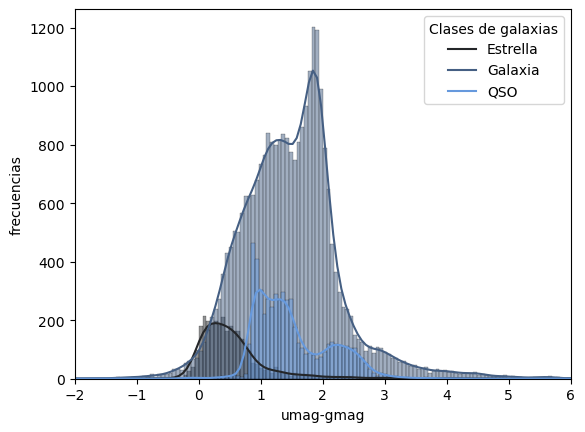

In [192]:
palette=sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.histplot(df, x='umag-gmag', hue='Hclass', kde=True, palette=palette)  
plt.xlim(-2,6)
plt.ylabel('frecuencias')

plt.legend(title='Clases de galaxias', labels=['Estrella', 'Galaxia', 'QSO'])
plt.show()

In [193]:
df['Hclass'].value_counts()

Hclass
1    27325
0     5714
2     3132
Name: count, dtype: int64

In [194]:
#Tengo que definir mis feature, mis variables de entrada, estas son las que utilizamos para entrenar el modelo
features = ['umag', 'gmag', 'rmag', 'imag', 'zmag', 'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 
            'umag-gmag', 'gmag-rmag', 'rmag-imag', 'imag-zmag', 'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 
            'Hmag-Kmag', 'W1mag-W2mag', 'g3mag-r3mag', 'r3mag-i3mag', 
            'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag','W1mag/W2mag', 'umag/gmag', 'gmag/rmag', 'rmag/imag', 'Hmag/Kmag', 'Jmag/Hmag']
#Me quedo con mis mejores estimadores
#features = [
#            'umag-gmag', 'gmag-rmag', 'rmag-imag', 'Ymag-Jmag', 'Jmag-Hmag', 
#            'Hmag-Kmag', 'W1mag-W2mag', 'g3mag-r3mag', 'r3mag-i3mag',
#             'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag']

In [195]:
df_tr, df_te=train_test_split(df,test_size=0.3,random_state=42)
#Divide el conjunto de datos en entrenamiento (70%) y prueba (30%)

In [196]:
#Ahora dividimos en clases de entrenamiento
X_train = df_tr[features]
y_train = df_tr['Hclass']

#lo mismo con el testeo
X_test=df_te[features]
y_test=df_te['Hclass']


In [197]:
#Tengo que escalar los datos

In [198]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = MLPClassifier(solver='sgd', alpha=0.001, 
                    hidden_layer_sizes=(100, 50), random_state=1, max_iter=1000)
clf.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 50), max_iter=1000,
              random_state=1, solver='sgd')

In [199]:
y_pred = clf.predict(X_test_scaled)

In [200]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1701   18    4]
 [  13 8179   40]
 [   5   69  823]]


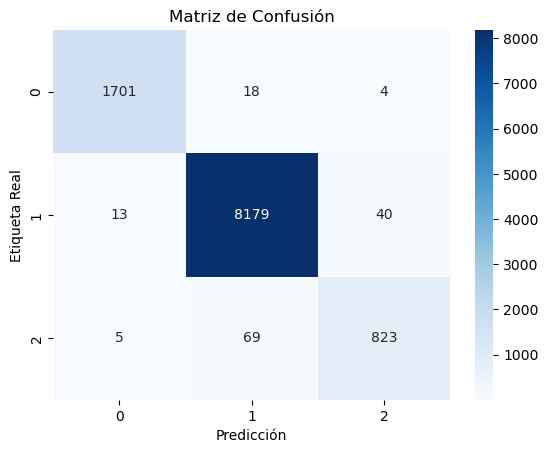

In [201]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1723
           1       0.99      0.99      0.99      8232
           2       0.95      0.92      0.93       897

    accuracy                           0.99     10852
   macro avg       0.98      0.97      0.97     10852
weighted avg       0.99      0.99      0.99     10852



In [203]:
f1_score(y_test,y_pred,average='weighted')

0.9861885013130078

In [204]:
#clf = MLPClassifier(solver='sgd', alpha=0.001, 
#                    hidden_layer_sizes=(100, 50), random_state=1, max_iter=1000)
## Definir el espacio de hiperparámetros
#param_grid = {
#    'alpha': [0.0001, 0.001, 0.01],
#    'hidden_layer_sizes': [(100,), (50, 50) ,(200,100) ,(100,50)],
#    'learning_rate': ['constant', 'invscaling', 'adaptive'],
#    'learning_rate_init': [0.001, 0.01]
#}
#
## Configurar el GridSearch
#grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=2)
#
## Ajustar el modelo a los datos de entrenamiento
#grid_search.fit(X_train_scaled, y_train)
#
## Obtener el mejor modelo encontrado
#best_model = grid_search.best_estimator_

In [205]:
#print(grid_search.best_params_)


In [206]:
#best_model = grid_search.best_estimator_
print(f"Score del mejor modelo: {grid_search.best_score_}")


Score del mejor modelo: 0.9844385388652738


In [207]:
# Convertir resultados a un DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Ordenar por puntaje
print(results[['params', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False))


                                               params  mean_test_score  \
46  {'alpha': 0.001, 'hidden_layer_sizes': (100, 5...         0.984439   
22  {'alpha': 0.0001, 'hidden_layer_sizes': (100, ...         0.984439   
70  {'alpha': 0.01, 'hidden_layer_sizes': (100, 50...         0.984399   
66  {'alpha': 0.01, 'hidden_layer_sizes': (100, 50...         0.984399   
18  {'alpha': 0.0001, 'hidden_layer_sizes': (100, ...         0.984399   
..                                                ...              ...   
2   {'alpha': 0.0001, 'hidden_layer_sizes': (100,)...         0.911529   
50  {'alpha': 0.01, 'hidden_layer_sizes': (100,), ...         0.911529   
8   {'alpha': 0.0001, 'hidden_layer_sizes': (50, 5...         0.904301   
56  {'alpha': 0.01, 'hidden_layer_sizes': (50, 50)...         0.904301   
32  {'alpha': 0.001, 'hidden_layer_sizes': (50, 50...         0.904301   

    std_test_score  
46        0.000913  
22        0.000913  
70        0.000927  
66        0.000927  
18    

In [211]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Separar datos en entrenamiento y prueba
df_tr, df_te = train_test_split(df, test_size=0.3, random_state=42)

# Definir características y etiquetas
X_train = df_tr[features]
y_train = df_tr['Hclass']
X_test = df_te[features]
y_test = df_te['Hclass']

# Escala las características para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce la dimensionalidad del conjunto de datos mientras retiene el 95% de la varianza
pca = PCA(n_components=0.98)  # Retener 95% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


best_clf = MLPClassifier(
    solver='sgd',  # Método de optimización: entrena el modelo ajustando los pesos iterativamente usando gradientes calculados sobre pequeñas muestras del conjunto de datos
    alpha=0.01,  # Regularización aplicada a los pesos de la red
    hidden_layer_sizes=(150, 100, 25),  # Configuración de las capas ocultas:Especifica la arquitectura de la red neuronal, indicando el número de neuronas en cada capa oculta.
    learning_rate='adaptive',  # Tasa de aprendizaje adaptativa
    learning_rate_init=0.01,  # Tasa de aprendizaje inicial
    random_state=1,  # Para reproducibilidad
    max_iter=2000,  # Número máximo de iteraciones
    tol=1e-8,  # Criterio de stop de tolerancia
    
    verbose=True  # Habilitar salida detallada
    
)

best_clf.fit(X_train_pca, y_train)

# Evaluar modelo
train_score = best_clf.score(X_train_pca, y_train) 
test_score = best_clf.score(X_test_pca, y_test) 

print(f"Score en entrenamiento: {train_score:.4f}")
print(f"Score en prueba: {test_score:.4f}")

Iteration 1, loss = 0.19586543
Iteration 2, loss = 0.09074769
Iteration 3, loss = 0.08480377
Iteration 4, loss = 0.08125921
Iteration 5, loss = 0.07800143
Iteration 6, loss = 0.07597884
Iteration 7, loss = 0.07380419
Iteration 8, loss = 0.07186018
Iteration 9, loss = 0.07061921
Iteration 10, loss = 0.06917946
Iteration 11, loss = 0.06779090
Iteration 12, loss = 0.06644489
Iteration 13, loss = 0.06555043
Iteration 14, loss = 0.06474785
Iteration 15, loss = 0.06350452
Iteration 16, loss = 0.06247464
Iteration 17, loss = 0.06184646
Iteration 18, loss = 0.06102782
Iteration 19, loss = 0.05995063
Iteration 20, loss = 0.05929934
Iteration 21, loss = 0.05848462
Iteration 22, loss = 0.05793119
Iteration 23, loss = 0.05772703
Iteration 24, loss = 0.05676254
Iteration 25, loss = 0.05638493
Iteration 26, loss = 0.05530483
Iteration 27, loss = 0.05489391
Iteration 28, loss = 0.05454157
Iteration 29, loss = 0.05424137
Iteration 30, loss = 0.05387041
Iteration 31, loss = 0.05254555
Iteration 32, los

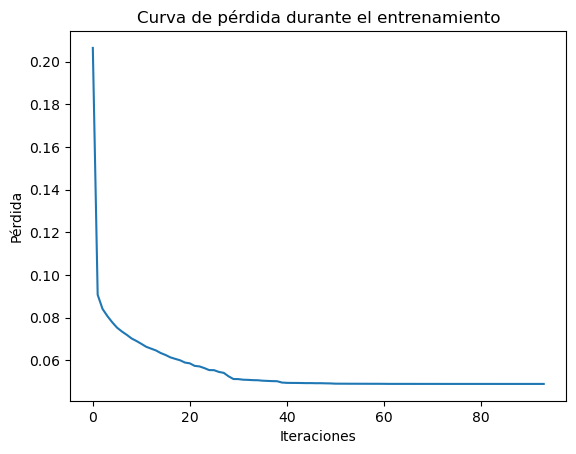

In [210]:
import matplotlib.pyplot as plt

plt.plot(best_clf.loss_curve_)
plt.title("Curva de pérdida durante el entrenamiento")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.show()


/home/camila/miniconda3/envs/astrometria/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/camila/miniconda3/envs/astrometria/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/camila/miniconda3/envs/astrometria/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/camila/miniconda3/envs/astrometria/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

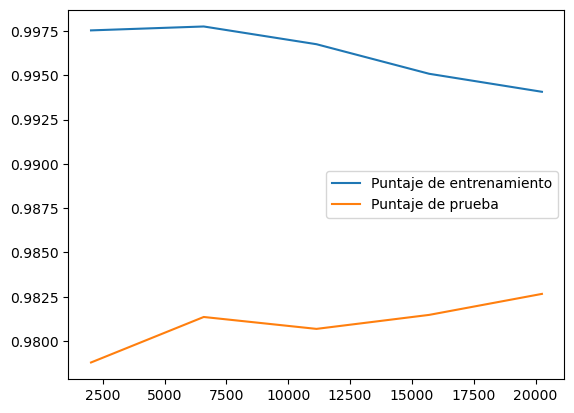

In [ ]:
from sklearn.model_selection import learning_curve #evalúa el desempeño de un modelo para diferentes tamaños de conjunto de entrenamiento

train_sizes, train_scores, test_scores = learning_curve(MLPClassifier(), X_train_scaled, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Puntaje de entrenamiento")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Puntaje de prueba")
#Calcula el promedio de los puntajes de entrenamiento para cada tamaño de muestra
plt.legend()
plt.show()
#Representa cómo el modelo se desempeña en el conjunto de datos con el que fue entrenado.


In [ ]:
y_pred = best_clf.predict(X_test_pca)


In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1690   29    4]
 [  18 8152   62]
 [   3   66  828]]


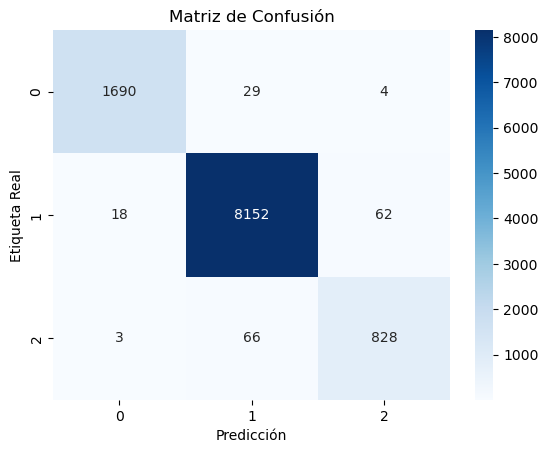

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1723
           1       0.99      0.99      0.99      8232
           2       0.93      0.92      0.92       897

    accuracy                           0.98     10852
   macro avg       0.97      0.96      0.97     10852
weighted avg       0.98      0.98      0.98     10852



In [212]:
f1_score(y_test,y_pred,average='weighted')

0.9861885013130078

In [213]:
#Tengo que volver a preparar el conjunto submit
df_submit=pd.read_csv('test.csv')
df_submit.set_index('ID',inplace=True)

In [214]:
# Verifica la existencia de columnas antes de realizar cálculos
Bandas = ['umag', 'gmag', 'rmag', 'imag', 'zmag', 'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag']

# Diferencias entre bandas totales
for i in range(len(Bandas) - 1):
    if Bandas[i] in df_submit.columns and Bandas[i + 1] in df_submit.columns:
        df_submit[f'{Bandas[i]}-{Bandas[i+1]}'] = df_submit[Bandas[i]] - df_submit[Bandas[i + 1]]

# Magnitudes a radio constante (3 arcseconds)
Bandas_rad = ['u3mag', 'g3mag', 'r3mag', 'i3mag', 'Z3mag', 'Y3mag', 'J3mag', 'H3mag', 'K3mag']
for i in range(len(Bandas_rad) - 1):
    if Bandas_rad[i] in df_submit.columns and Bandas_rad[i + 1] in df_submit.columns:
        df_submit[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}'] = df_submit[Bandas_rad[i]] - df_submit[Bandas_rad[i + 1]]

# Diferencias entre bandas HLR
Bandas_HLR = ['Yhlr', 'Jhlr', 'Hhlr', 'Khlr']
for i in range(len(Bandas_HLR) - 1):
    if Bandas_HLR[i] in df_submit.columns and Bandas_HLR[i + 1] in df_submit.columns:
        df_submit[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}'] = df_submit[Bandas_HLR[i]] - df_submit[Bandas_HLR[i + 1]]

# Cálculo de razones entre bandas
if 'W1mag' in df_submit.columns and 'W2mag' in df_submit.columns:
    df_submit['W1mag/W2mag'] = df_submit['W1mag'] / df_submit['W2mag']
if 'umag' in df_submit.columns and 'gmag' in df_submit.columns:
    df_submit['umag/gmag'] = df_submit['umag'] / df_submit['gmag']
if 'gmag' in df_submit.columns and 'rmag' in df_submit.columns:
    df_submit['gmag/rmag'] = df_submit['gmag'] / df_submit['rmag']
if 'rmag' in df_submit.columns and 'imag' in df_submit.columns:
    df_submit['rmag/imag'] = df_submit['rmag'] / df_submit['imag']
if 'Hmag' in df_submit.columns and 'Kmag' in df_submit.columns:
    df_submit['Hmag/Kmag'] = df_submit['Hmag'] / df_submit['Kmag']
if 'Jmag' in df_submit.columns and 'Hmag' in df_submit.columns:
    df_submit['Jmag/Hmag'] = df_submit['Jmag'] / df_submit['Hmag']


In [215]:
print(df_tr.columns)  # estas son las que uso para entrenar
print(df_submit.columns)  #Con esto imprimo las columnas del submir

Index(['RAdeg', 'DEdeg', 'Hclass', 'umag', 'gmag', 'rmag', 'imag', 'zmag',
       'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'u3mag', 'g3mag',
       'r3mag', 'i3mag', 'Z3mag', 'Y3mag', 'J3mag', 'H3mag', 'K3mag', 'Yhlr',
       'Jhlr', 'Hhlr', 'Khlr', 'umag-gmag', 'gmag-rmag', 'rmag-imag',
       'imag-zmag', 'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag',
       'Kmag-W1mag', 'W1mag-W2mag', 'u3mag-g3mag', 'g3mag-r3mag',
       'r3mag-i3mag', 'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag',
       'J3mag-H3mag', 'H3mag-K3mag', 'Yhlr-Jhlr', 'Jhlr-Hhlr', 'Hhlr-Khlr',
       'W1mag/W2mag', 'umag/gmag', 'gmag/rmag', 'rmag/imag', 'Hmag/Kmag',
       'Jmag/Hmag'],
      dtype='object')
Index(['RAdeg', 'DEdeg', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'Ymag',
       'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'u3mag', 'g3mag', 'r3mag',
       'i3mag', 'Z3mag', 'Y3mag', 'J3mag', 'H3mag', 'K3mag', 'Yhlr', 'Jhlr',
       'Hhlr', 'Khlr', 'umag-gmag', 'gmag-rmag', 'rmag-imag', 'imag-zmag',
   

In [216]:
print(features)

['umag', 'gmag', 'rmag', 'imag', 'zmag', 'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'umag-gmag', 'gmag-rmag', 'rmag-imag', 'imag-zmag', 'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag', 'W1mag-W2mag', 'g3mag-r3mag', 'r3mag-i3mag', 'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag', 'W1mag/W2mag', 'umag/gmag', 'gmag/rmag', 'rmag/imag', 'Hmag/Kmag', 'Jmag/Hmag']


In [217]:
df_submit = df_submit[features]



In [218]:
print("Características usadas en el modelo:", len(features))
print("Características en df_submit:", len(df_submit.columns))


Características usadas en el modelo: 33
Características en df_submit: 33


In [219]:
print(df_submit.isnull().sum())  # Verifica columnas con valores faltantes


umag           0
gmag           0
rmag           0
imag           0
zmag           0
Ymag           0
Jmag           0
Hmag           0
Kmag           0
W1mag          0
W2mag          0
umag-gmag      0
gmag-rmag      0
rmag-imag      0
imag-zmag      0
zmag-Ymag      0
Ymag-Jmag      0
Jmag-Hmag      0
Hmag-Kmag      0
W1mag-W2mag    0
g3mag-r3mag    0
r3mag-i3mag    0
i3mag-Z3mag    0
Z3mag-Y3mag    0
Y3mag-J3mag    0
J3mag-H3mag    0
H3mag-K3mag    0
W1mag/W2mag    0
umag/gmag      0
gmag/rmag      0
rmag/imag      0
Hmag/Kmag      0
Jmag/Hmag      0
dtype: int64


In [220]:
df_submit.fillna(-99, inplace=True)  # Usa el mismo valor que durante el entrenamiento


In [221]:
# Si usaste un StandardScaler, MinMaxScaler, etc.
df_submit_scaled = scaler.transform(df_submit)
df_submit_pca = pca.transform(df_submit_scaled)


In [222]:
print("Forma de df_submit:", df_submit.shape)
print("Esperado por el modelo:", best_clf.n_features_in_)


Forma de df_submit: (12172, 33)
Esperado por el modelo: 12


In [223]:
predictions = best_clf.predict(df_submit_pca)

In [224]:
print(df_tr.columns)  # estas son las que uso para entrenar
print(df_submit.columns)  #Con esto imprimo las columnas del submir

Index(['RAdeg', 'DEdeg', 'Hclass', 'umag', 'gmag', 'rmag', 'imag', 'zmag',
       'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'u3mag', 'g3mag',
       'r3mag', 'i3mag', 'Z3mag', 'Y3mag', 'J3mag', 'H3mag', 'K3mag', 'Yhlr',
       'Jhlr', 'Hhlr', 'Khlr', 'umag-gmag', 'gmag-rmag', 'rmag-imag',
       'imag-zmag', 'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag',
       'Kmag-W1mag', 'W1mag-W2mag', 'u3mag-g3mag', 'g3mag-r3mag',
       'r3mag-i3mag', 'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag',
       'J3mag-H3mag', 'H3mag-K3mag', 'Yhlr-Jhlr', 'Jhlr-Hhlr', 'Hhlr-Khlr',
       'W1mag/W2mag', 'umag/gmag', 'gmag/rmag', 'rmag/imag', 'Hmag/Kmag',
       'Jmag/Hmag'],
      dtype='object')
Index(['umag', 'gmag', 'rmag', 'imag', 'zmag', 'Ymag', 'Jmag', 'Hmag', 'Kmag',
       'W1mag', 'W2mag', 'umag-gmag', 'gmag-rmag', 'rmag-imag', 'imag-zmag',
       'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag', 'W1mag-W2mag',
       'g3mag-r3mag', 'r3mag-i3mag', 'i3mag-Z3mag', 'Z3mag-Y3mag',
       

In [225]:
df_submit['Hclass']=predictions

In [226]:
df_submit.loc[:,['Hclass']].to_csv('submission.csv',index=True) #Este es el que queremos subir a la competencia
